<h1> Teoría, índice autovalores, formas Jordan </h1>

Dada una matriz $A$

$$R(A)=\text{espacio vectorial que generan las columnas de} A$$

y $$rank(A)=dim(R(A))$$


![](indice.png)
![](jordan.png)
![](P_jordan1.png)
![](P_jordan2.png)
![](P_jordan3.png)






<h1> Ejemplo 1: Matriz nilpotente con 4 bloques de Jordan</h1>



In [1]:
from sympy import *
init_printing()

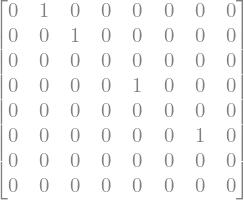

In [2]:
J=Matrix([[0, 1, 0, 0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0]         
         ])
J

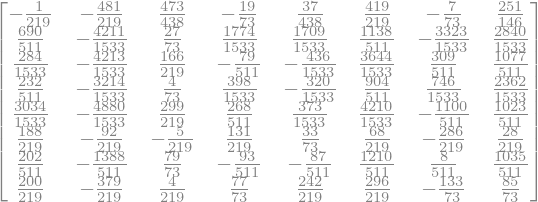

In [3]:
#Generamos matriz aleatoria de enteros y obtenemos un A 
# Cada vez que se ejecuta se cambia el A, pero J es el mismo
from numpy.random import randint
P=randint(5, size=(8, 8))
P=Matrix(P)
A=P*J*P.inv()
A

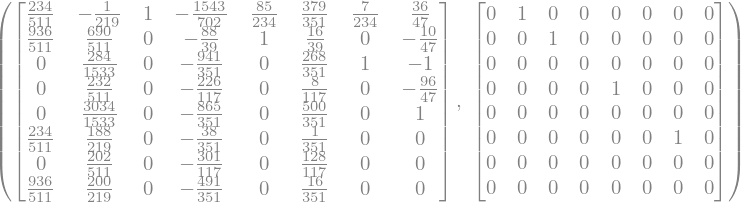

In [4]:
A.jordan_form()

In [5]:
lam=symbols('lambda')
p=(A-lam*eye(8)).det() #polinomio característico
p.factor()

Un único autovalor $\lambda=0$. 

$$\operatorname{multalg}(0)=8$$

In [6]:
B=A-0*eye(8)
B.rank()

$$\operatorname{multgeo}(0)=8-4=4$$
Hay $4$ bloques elementales de Jordan para $\lambda=0$.  
Calculamos el índice

In [7]:
r=[(B**j).rank() for j in range(6)]
r

$\operatorname{index}(A)=3$. 

Hay un bloque de $3\times 3$, pero el resto se puede distribuir de distintas maneras, puede haber dos de $2\times 2$ y 1 de $1\times 1$ o uno de $2\times 2$ y 3 de  $1\times 1$ (por ejemplo) 


 

Así que necesitamos calcular 
$$
\nu_j(0)=r_{j-1}(0)-2r_j(0)+r_{j+1}(0),\quad j=1,2,3
$$

In [8]:
nu=[r[j-1]-2*r[j]+r[j+1] for j in range(1,5)]
nu

Hay 1 de $3\times 3$,  $2$ de $2\times 2$ y  $1$ de $1\times 1$

![](jordan0.png)

<h3> Computo de una base de $\operatorname{ker}(C)\cap R(D)$</h3> 
Hacemos tres pasos:

   1) Computar una base de $R(D)$ la función rref devuelve las columnas de $D$ que forman una base de $R(D)$. 

**Discusión** Supongamos $X_1,X_2,...,X_s$ es la base de $R(D)$ computada en el paso 1. Necesitamos un vector que se escriba como combinación de $X_1,X_2,...,X_s$ y a la vez esté en $\operatorname{ker}(C)$, es decir debemos encontrar $\alpha_1,...,\alpha_s$ tales que 
$$C\left(\sum_{j=1}^s\alpha_jX_j\right)=\sum_{j=1}^s\alpha_jCX_j=0.$$
Podemos escribir esta ecuación

$$\left[CX_1 |...|CX_s\right]\begin{pmatrix} \alpha_1\\ \vdots \\\alpha_s\end{pmatrix}=\begin{pmatrix} 0\\ \vdots \\ 0\end{pmatrix}.$$

Es decir

$$\begin{pmatrix} \alpha_1\\ \vdots \\\alpha_s\end{pmatrix}\in \operatorname{ker}(CX).$$

2)Luego   computamos una base de $\operatorname{ker}(CX)$. La función nullspace de sympy hace eso.

3) Si $V_1,...,V_r$ son la base del paso 2, finalmente las columnas de $XV$ son la respuesta a nuestro problema.

Todo esto se lo tenemos que aplicar cuando buscamos hallar una descomposición de Jordan a $C=B=A-\lambda I$  $D=B^j$.

En el ejemplo en que estamos $\lambda=0$ y $A-\lambda I=A$ y $B=A^2$

Procedamos a hallar una base de $\operatorname{ker}(B)\cap R(B^2)$ por los pasos 1, 2 y 3.


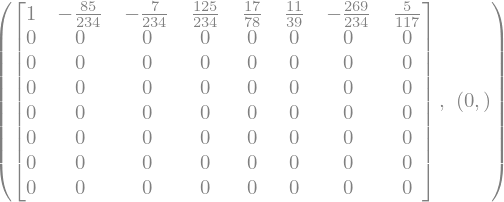

In [9]:
IndBas=(B**2).rref()
IndBas

$\operatorname{rank}(B^2)=1$ cosa que ya sabíamos. La matriz en la primera componente es la forma reducida de $B^2$ y la segunda componente son las posiciones de las columnas básicas. Hay un sólo vector en la matriz $X$. Podemos tomar la primera columna de $B^2$.

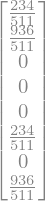

In [10]:
X=(B**2)[:,IndBas[1]]
X

Completamos el paso 1. Arrojo un solo $X$. Necesitamos ahora hallar una base de $\operatorname{ker}(AX)$. 


In [11]:
V=(A*X).nullspace() 
V=Matrix(V)
V

Completamos el paso 2. Como  $AX$ es una matriz con una sola columna, actúa de $\mathbb{C}\to \mathbb{C}$ y tiene un nucleo no trivial, es necesario $AX=0$

In [12]:
A*X
 

In [13]:
P1= X*V

![](jordan1.png)

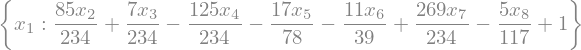

In [14]:
x=symbols('x1:9')
x=Matrix(x)
S=solve(B**2*x-P1,x)
S 

In [15]:
#Elegimos un P3. 
P3=x.subs(S).subs({x[j]:0 for j in range(1,8)} )
P3


![](jordan2.png)

In [16]:
P2=B*P3
P=Matrix([P1.T,P2.T,P3.T]).T #formamos las primeras 3 columnas de $P$


![](jordan3.png)

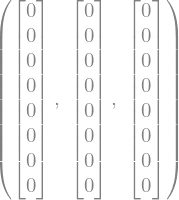

In [17]:
#Chequeo si forman cadena de Jordan
B*P3-P2,B*P2-P1, B*P1

Ahora hay que encontrar 2 vectores en $\mathcal{M}_1=R(B)\cap\operatorname{ker}(B)$, pero deben ser linealmente idependientes con el que ya encontré $P_1\in\operatorname{ker}(B)$ y de modo que los tres juntos sean base de  $\mathcal{M}_1$. La metodología anterior nos permite encontrar una base del subespacio $\mathcal{M}_1=R(B)\cap\operatorname{ker}(B)$, vamos a hallar 3 vectores pues tiene dimensión 3. Pero necesitamos que nuestra base tenga el $P_1$ dentro y nada nos dice que esto suceda. Lo que se hace es a con los tres se le anexa $P_1$. Asi forman un sistema linealmente dependiente. Acto seguido descartamos uno, distinto de $P_1$, de modo tal que los vectores que queda sean linealmente independientes.   Para hacer eso, calculamos una base de  $\operatorname{ker}(B)$ y los ponemos como columnas de una matriz,  le anexo en la primera columna el $P_1$ y uso el comando rref(), que me halla la forma escalera. Las columnas con pivotes son linealmente independientes. La primera tiene pivote, corresponde al $P_1$, esa no se considera, se toman las dos siguientes con pivotes.

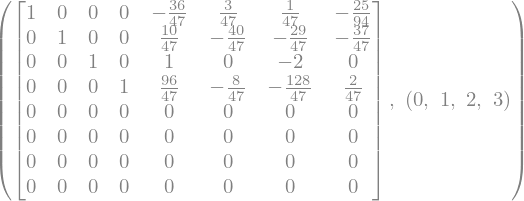

In [18]:
IndBas=B.rref()
IndBas

In [19]:
X=B[:,IndBas[1]] #Se usa la 2da componente que devuelve rref para extraer columnas
V=(B*X).nullspace() 
V=Matrix([v.T for v in V]).T #nullspace devuelve listas, lo convierto a matriz


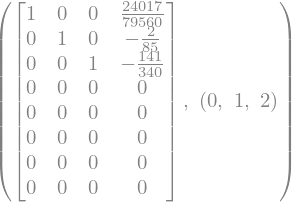

In [20]:
B0=X*V
B0=B0.col_insert(0,P1) #Agregamos P1 como primera columna
B0.rref()


In [21]:
P4=B0[:,1]
P6=B0[:,2]
 

![](jordan4.png)

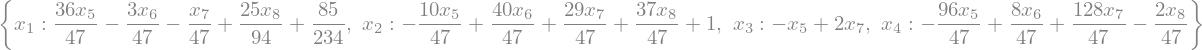

In [22]:
S=solve(B*x-P4,x) #Revisar las sustituciones, pueden cambiar con la ejecución
S

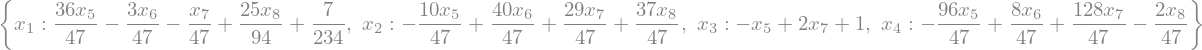

In [23]:
P5=x.subs(S).subs({x[j]:0 for j in range(4,8)})
S=solve(B*x-P6,x)
S

In [24]:
P7=x.subs(S).subs({x[j]:0 for j in range(4,8)})

![](jordan5.png)
Amplio $P$ con los nuevos 4 vectores

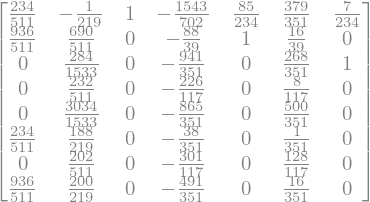

In [25]:
Q=Matrix([P4.T,P5.T,P6.T,P7.T]).T
P= P.col_insert(3,Q)
P

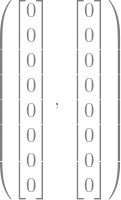

In [26]:
#chequeamos que formen cadenas
B*P7-P6, B*P6

Por último, para el bloque de $1\times 1$ debemos conseguir un autovector linealemnte independiente de todos los anteriores. Los autovectores me quedaron en las columnas 0,3 y 5 de $P$. Para hallar el autovector que me falta, 1) hallo una base de $\operatorname{ker}(B)$ y formo una matriz $B_0$ con ellos, 2) le adjunto los autovectores que ya tenía en las primeras columnas de $B_0$. 3) Hallo forma escalera de $B$. Habrá pivotes en las primeras 3 columnas, pues son los 3 autovectores linealmente independientes que ya tenía, la columna siguiente con pivote nos servirá de $P_8$ 

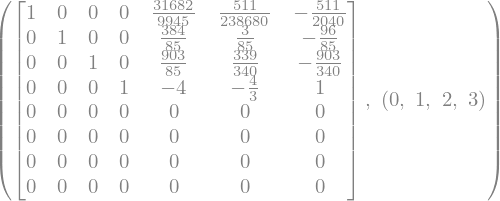

In [27]:
X=B.nullspace()
B0=Matrix([x.T for x in X]).T
B0=B0.col_insert(0,P[:,[0,3,5]])
B0.rref()

In [28]:
P8=B0[:,3]
solve(B*x-P8,x) # Por curiosidad vemos si podemos armar una cadena de Jordan arriba 
#de $P8$ y constatamos que no (como debe ser)


![](jordan6.png)

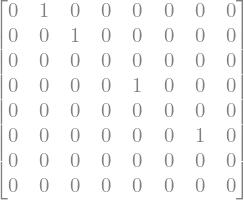

In [29]:
P=P.col_insert(7,P8)
P.inv()*A*P

<h3> vualá!!! </h3>

<h1> Ejemplo 2</h1>
Hallar la forma de Jordan $J$ y la matriz $P$ de 

$$A=\left[\begin{matrix}5 & 4 & 0 & 0 & 4 & 3\\
2 & 3 & 1 & 0 & 5 & 1\\
0 & -1 & 2 & 0 & 2 & 0\\
-8 & -8 & -1 & 2 & -12 & -7\\
0 & 0 & 0 & 0 & -1 & 0\\
-8 & -8 & -1 & 0 & -9 & -5\\
\end{matrix}\right]$$

In [30]:
A=Matrix([[5, 4, 0 ,0, 4,3],
           [2, 3, 1, 0, 5, 1],
           [0, -1, 2, 0, 2, 0],
           [-8, -8,-1, 2,-12,-7],
           [0, 0, 0, 0,-1, 0],
           [-8,-8,-1, 0,-9,-5]])


In [31]:
lam=symbols('lambda')
p=(A-lam*eye(6)).det()
p

In [32]:
p.factor()

Entonces

$$\sigma(A)=\{2,-1\}$$

$$\operatorname{multalg}(2)=4,$$

$$\operatorname{multalg}(-1)=2.$$  

Computemos multiplicidades geométricas. 
Respecto al autovalor $\lambda=-1$

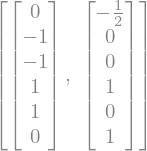

In [33]:
X=(A+eye(6)).nullspace() 
X

$$\operatorname{multgeo}(-1)=2$$

Hay 2 autovectores loinealmente independientes y no es necesario hacer nada mas. 


In [34]:
P1,P2=X


Vamos con $\lambda=2$

In [35]:
B=A-2*eye(6)
r=[(B**j).rank() for j in range(6)]
nu=[r[j-1]-2*r[j]+r[j+1] for j in range(1,5)]
nu

$$\operatorname{multgeo}(2)=2$$

Hay 2 autovectores linealmente independientes el autovector es deficiente. 


Hay un bloque de Jordan de $1\times 1$ y otro de $3\times 3$. 

$$ \operatorname{indice}(2)=3.$$

Debemos econtrar una base, consistirá de un vector, de $\operatorname{ker}(B)\cap R(B^2)$. Usamos los pasos 1,2,3

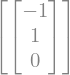

In [36]:
i=(B**2).rref()[1] #solo me interesan los indices de las columnas básicas
X=(B**2)[:,i]
S=(B*X).nullspace()
S


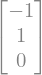

In [37]:
V=Matrix([v.T for v in S]).T #nullspace devuelve listas, lo convierto a matriz
V

In [38]:
P3= X*V
x=symbols('x1:7')
x=Matrix(x)
S=solve(B**2*x-P3,x)
S 

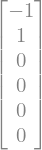

In [39]:
#Elegimos un P5. 
P5=x.subs(S).subs({x[j]:0 for j in range(2,6)} )
P5


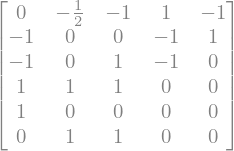

In [40]:
P4=B*P5
P=Matrix([P1.T,P2.T,P3.T, P4.T,P5.T]).T #formamos las primeras 3 columnas de $P$
P

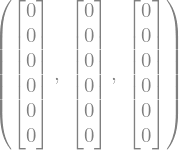

In [41]:
#Chequeo si forman cadena de Jordan
B*P5-P4,B*P4-P3, B*P3

Falta hallar un autovector para $\lambda=2$ linealmente independiente con $P_3$.


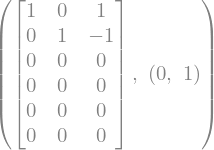

In [42]:
B0=B.nullspace()
B0=Matrix([V.T for V in B0]).T
B0=B0.col_insert(0,P3)
B0.rref()


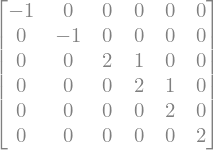

In [43]:
P6=B0[:,1]
P=P.col_insert(5,P6)
P.inv()*A*P

<h1> Ejemplo 3 </h1>

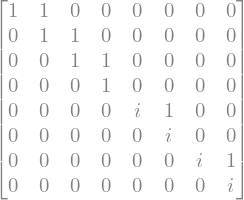

In [44]:
J=Matrix([[1, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 0, 0, 0],
          [0, 0, 1, 1, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 0, 0, I, 1, 0, 0],
          [0, 0, 0, 0, 0, I, 0, 0],
          [0, 0, 0, 0, 0, 0, I, 1],
          [0, 0, 0, 0, 0, 0, 0, I]         
         ])
J

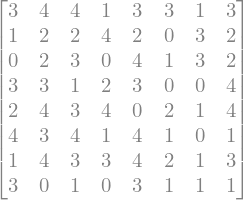

In [45]:
from numpy.random import randint
P=randint(5, size=(8, 8))
P=Matrix(P)
P

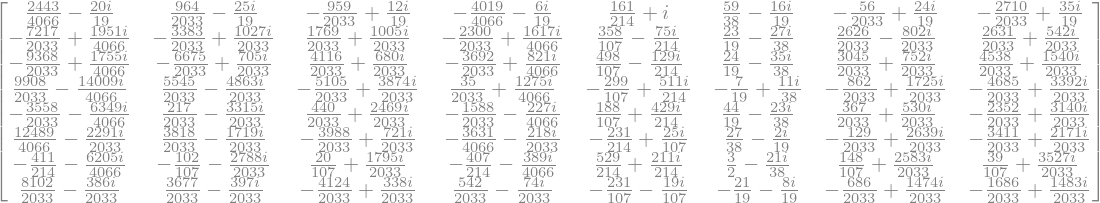

In [46]:
A=P*J*P.inv()
A

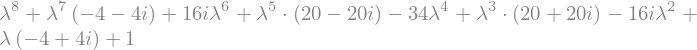

In [47]:
lam=symbols('lambda')
p=det(A-lam*eye(8))
p

In [48]:
p.factor()

Entonces

$$\sigma(A)=\{1,i\}$$

$$\operatorname{multalg}(1)=4,$$

$$\operatorname{multalg}(i)=4.$$  

Computemos estructura de Jordan para  $\lambda=1$

In [49]:
B=A-1*eye(8)
r=[(B**j).rank() for j in range(7)]
nu=[r[j-1]-2*r[j]+r[j+1] for j in range(1,6)]
nu

$$\operatorname{multgeo}(1)=1$$

Hay solo 1 autovector linealmente independientes el autovector es "muy" deficiente. 

Hay un bloque de Jordan  de $4\times 4$.

$$ \operatorname{indice}(1)=4.$$

Debemos econtrar una base, consistirá de un vector, de $\operatorname{ker}(B)\cap R(B^3)$. Usamos los pasos 1,2,3

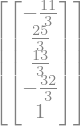

In [50]:
i=(B**3).rref()[1] #solo me interesan los indices de las columnas básicas
X=(B**3)[:,i]
S=(B*X).nullspace()
S


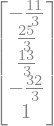

In [51]:
V=Matrix([v.T for v in S]).T #nullspace devuelve listas, lo convierto a matriz
V

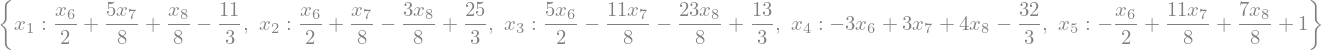

In [52]:
P1= X*V
x=symbols('x1:9')
x=Matrix(x)
S=solve(B**3*x-P1,x)
S 

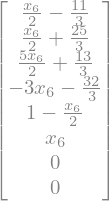

In [54]:
#Elegimos un P4. 
P4=x.subs(S).subs({x[4]:0, x[6]:0, x[7]:0})
P4


In [55]:
P3=B*P4
P2=B*P3


Vamos con $\lambda=i$

In [56]:
B=A-I*eye(8)
r=[(B**j).rank() for j in range(7)]
nu=[r[j-1]-2*r[j]+r[j+1] for j in range(1,6)]
nu

$$\operatorname{multgeo}(i)=2$$

Hay 2 autovectores linealmente independientes el autovector $i$ es  deficiente. 

Hay dos bloques de Jordan  de $2\times 2$.

$$ \operatorname{indice}(i)=2.$$

Debemos econtrar una base, consistirá de dos vectores, de $\operatorname{ker}(B)\cap R(B)$. Usamos los pasos 1,2,3

In [ ]:
i=(B).rref()[1] #solo me interesan los indices de las columnas básicas
X=(B)[:,i]
S=(B*X).nullspace()
V=Matrix([v.T for v in S]).T #nullspace devuelve listas, lo convierto a matriz
X*V

In [ ]:
P5=(X*V)[:,0]
P7=(X*V)[:,1]


In [ ]:
x=symbols('x1:9')
x=Matrix(x)
S=solve(B*x-P5,x)
S 

In [ ]:
#Elegimos P6
P6=x.subs(S).subs({x[4]:0, x[6]:0})
P6

In [ ]:
S=solve(B*x-P7,x)
S 

In [ ]:
P8=x.subs(S).subs({x[4]:0, x[6]:0})
P8

In [ ]:
P=Matrix([P1.T,P2.T,P3.T, P4.T,P5.T,P6.T,P7.T, P8.T]).T
P=simplify(P)
Q=P.inv()*A*P
simplify(Q)